In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("powerconsumption.csv")
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.shape

(52416, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df["Datetime"]=pd.to_datetime(df["Datetime"])

In [7]:
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute     # Includes minutes
df['DayOfWeek'] = df['Datetime'].dt.dayofweek   # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour,Minute,DayOfWeek,IsWeekend
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,0,6,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,10,6,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,20,6,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,30,6,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,40,6,1


In [11]:
df.Year.value_counts()

Year
2017    52416
Name: count, dtype: int64

In [12]:
df.describe()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour,Minute,DayOfWeek,IsWeekend
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.0,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,2017-07-01 23:55:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,2017.0,6.510989,15.678571,11.500000,25.000000,3.000000,0.285714
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,2017.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-04-01 23:57:30,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,2017.0,4.000000,8.000000,5.750000,10.000000,1.000000,0.000000
50%,2017-07-01 23:55:00,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,2017.0,7.000000,16.000000,11.500000,25.000000,3.000000,0.000000
75%,2017-09-30 23:52:30,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,2017.0,9.250000,23.000000,17.250000,40.000000,5.000000,1.000000
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,2017.0,12.000000,31.000000,23.000000,50.000000,6.000000,1.000000
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,0.0,3.440642,8.771822,6.922253,17.078414,2.000019,0.451758


## Time-Series Trends

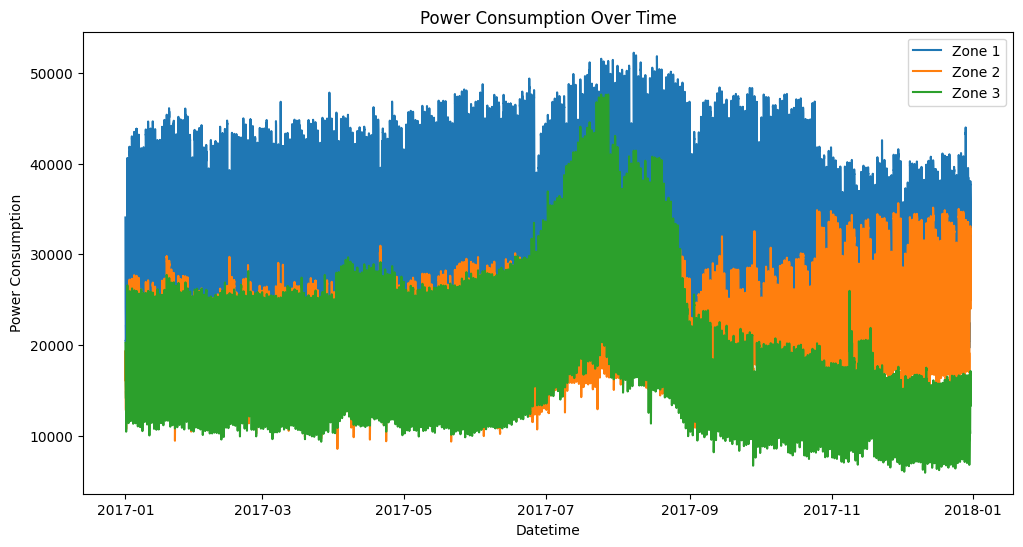

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Datetime'], df['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(df['Datetime'], df['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(df['Datetime'], df['PowerConsumption_Zone3'], label='Zone 3')
plt.title('Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


## Weather vs Power Relationship

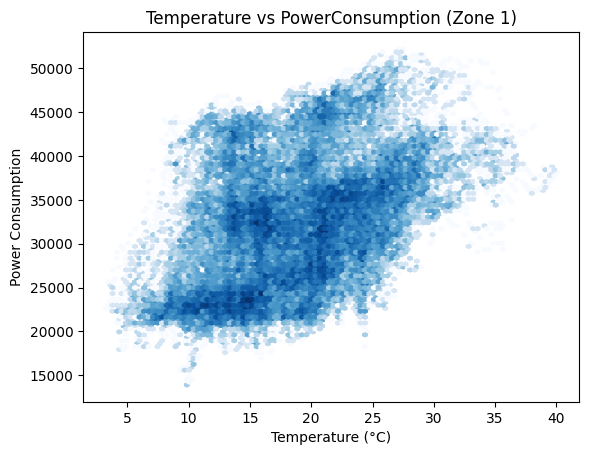

In [18]:
plt.hexbin(df['Temperature'], df['PowerConsumption_Zone1'],bins="log",cmap="Blues")
plt.title('Temperature vs PowerConsumption (Zone 1)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Power Consumption')
plt.show()

## Multi-Variable Correlation

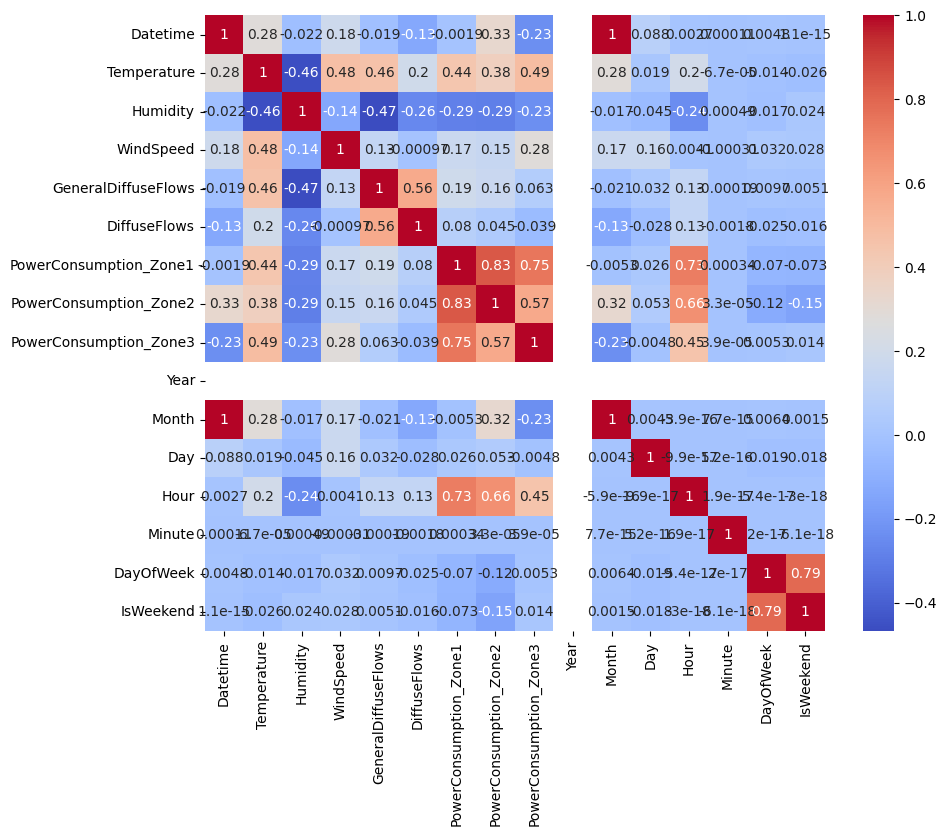

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

## Hourly & Weekly Patterns

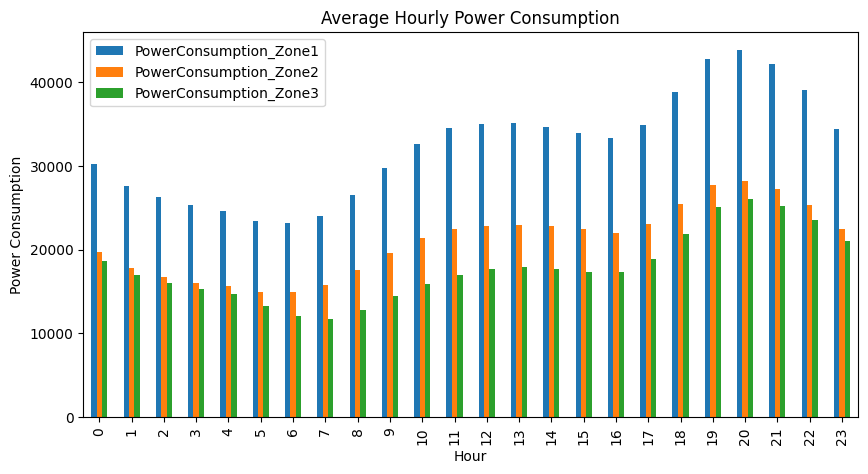

In [20]:
hourly = df.groupby('Hour')[['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']].mean()
hourly.plot(kind='bar', figsize=(10,5))
plt.title('Average Hourly Power Consumption')
plt.ylabel('Power Consumption')
plt.show()

## Power consumption on weekdays vs weekends

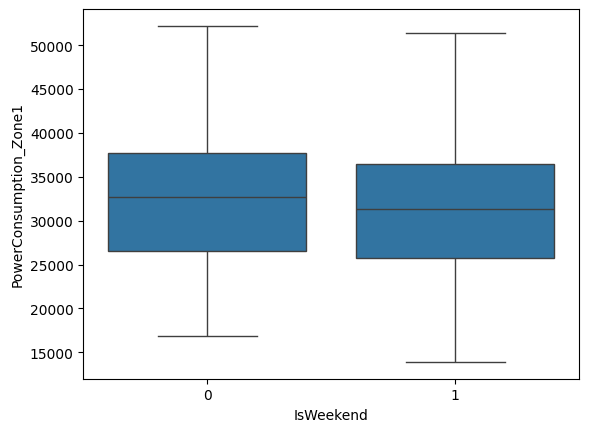

In [21]:
sns.boxplot(x='IsWeekend', y='PowerConsumption_Zone1', data=df)
plt.show()

## WindSpeed / DiffuseFlows impact

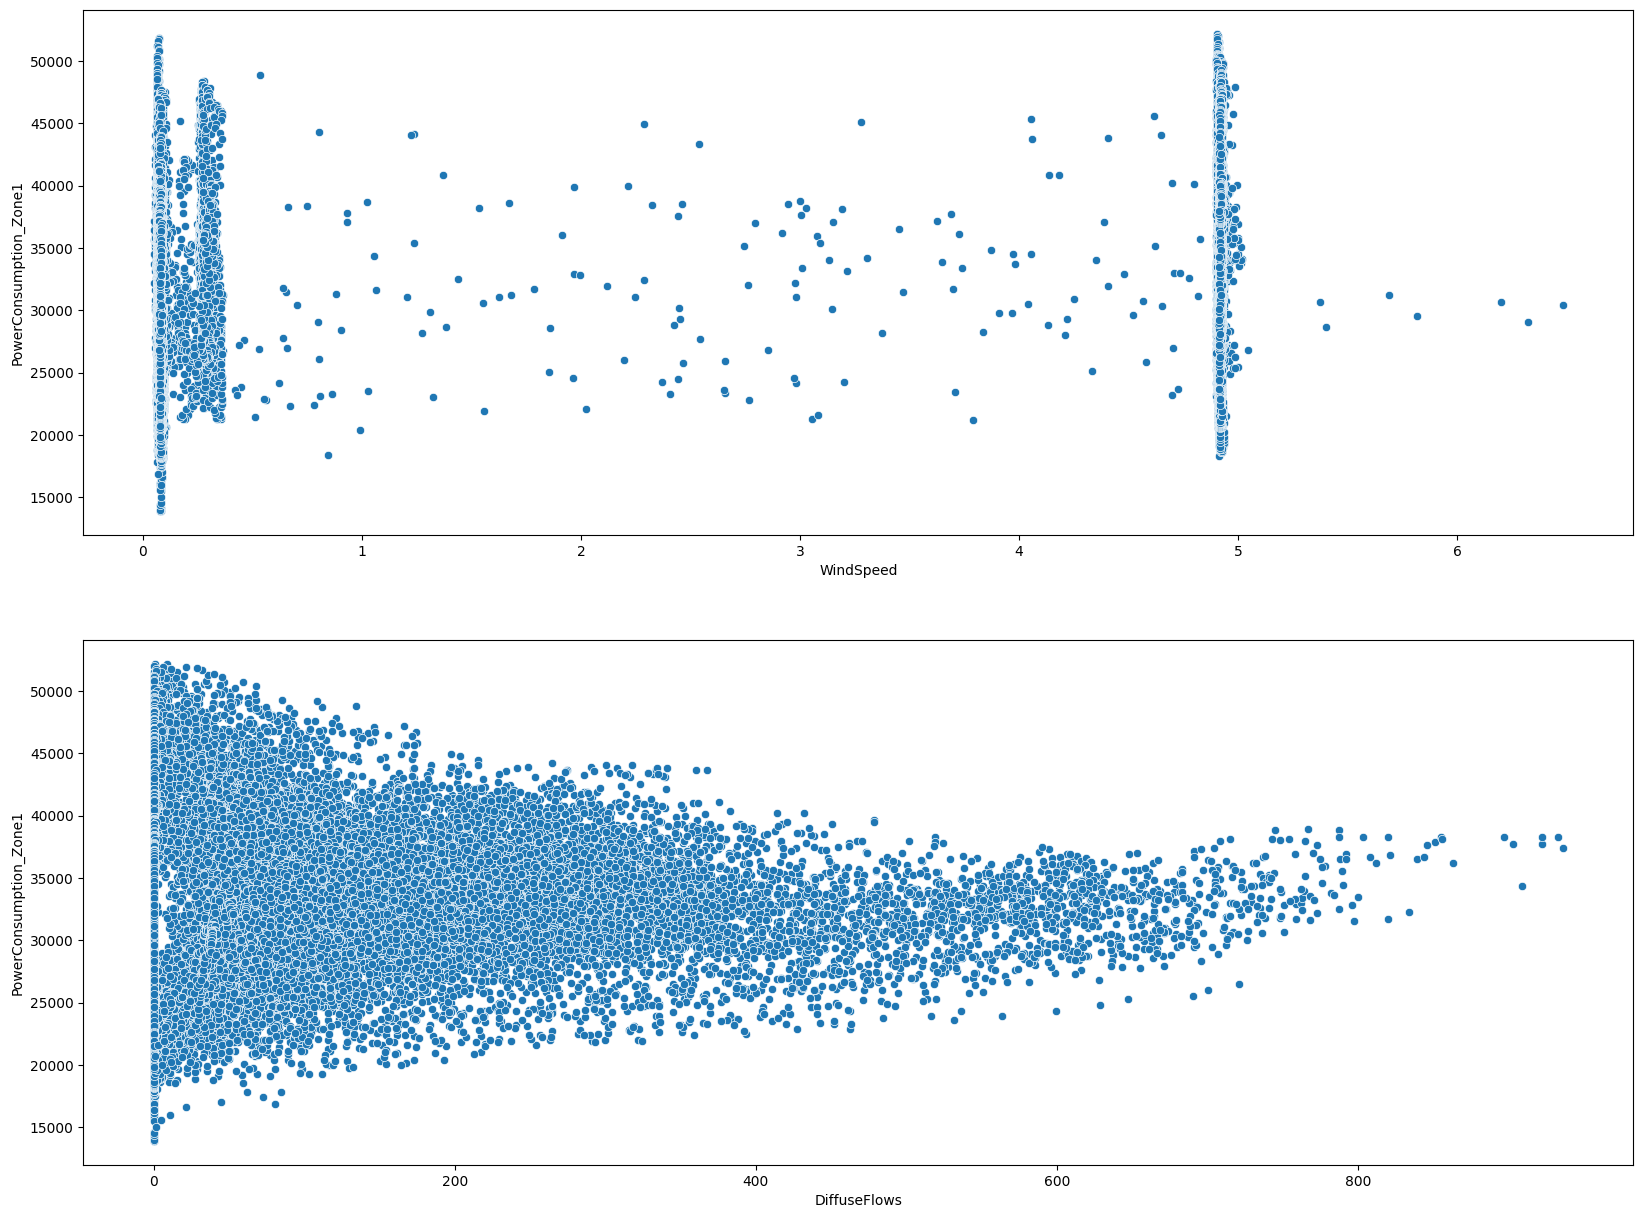

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.scatterplot(x='WindSpeed', y='PowerConsumption_Zone1', data=df)
plt.subplot(2,1,2)
sns.scatterplot(x='DiffuseFlows', y='PowerConsumption_Zone1', data=df)
plt.show()

## Pair Plot

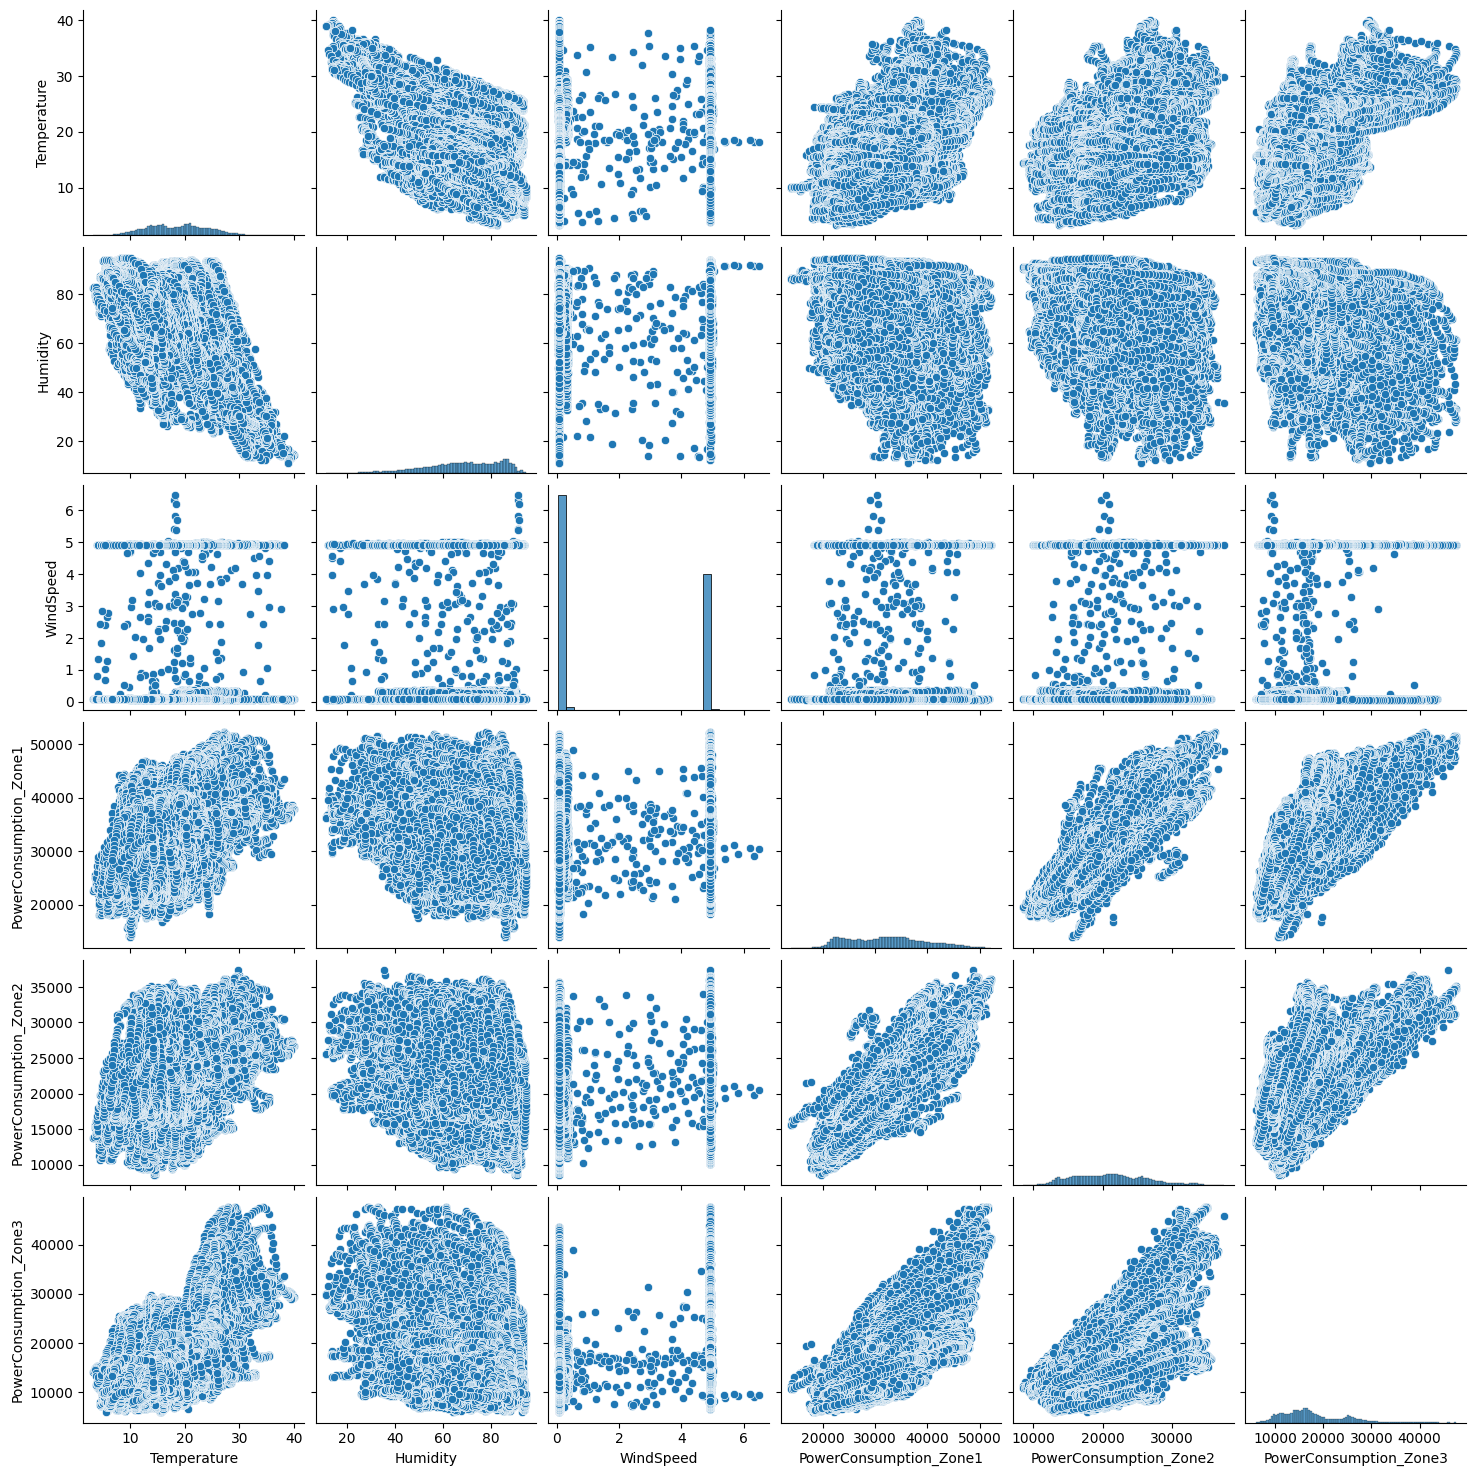

In [23]:
sns.pairplot(df[['Temperature','Humidity','WindSpeed',
                 'PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']])
plt.show()

## Seasonal Trend

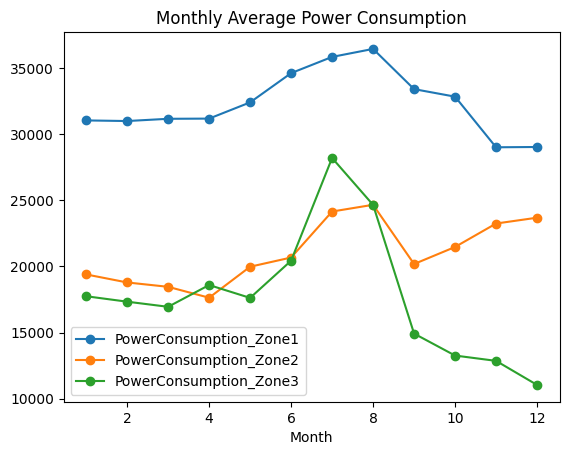

In [24]:
monthly = df.groupby('Month')[['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']].mean()
monthly.plot(marker='o')
plt.title('Monthly Average Power Consumption')
plt.show()

## Temperature vs Humidity vs PowerConsumption (Zone 1)

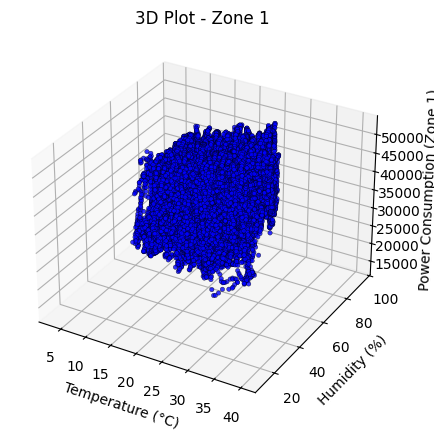

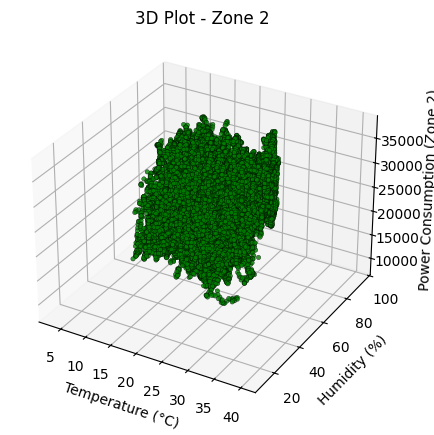

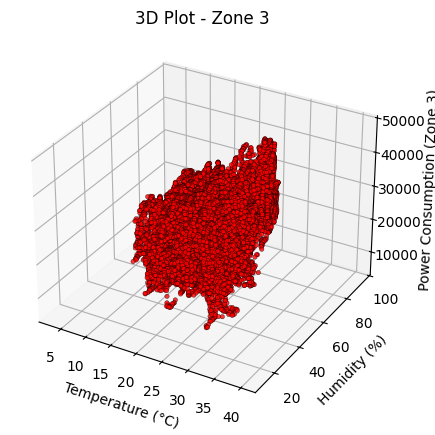

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Zone 1
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature'], df['Humidity'], df['PowerConsumption_Zone1'],
           c='blue', edgecolors='black', s=10,linewidths=0.3, alpha=0.8)   # 👈 added outlines
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Power Consumption (Zone 1)')
ax.set_title('3D Plot - Zone 1')
plt.show()

# Zone 2
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature'], df['Humidity'], df['PowerConsumption_Zone2'],
           c='green', edgecolors='black', s=10,linewidths=0.3, alpha=0.8)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Power Consumption (Zone 2)')
ax.set_title('3D Plot - Zone 2')
plt.show()

# Zone 3
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature'], df['Humidity'], df['PowerConsumption_Zone3'],
           c='red', edgecolors='black', s=10,linewidths=0.3, alpha=0.8)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Power Consumption (Zone 3)')
ax.set_title('3D Plot - Zone 3')
plt.show()


## Hour vs Temperature vs PowerConsumption

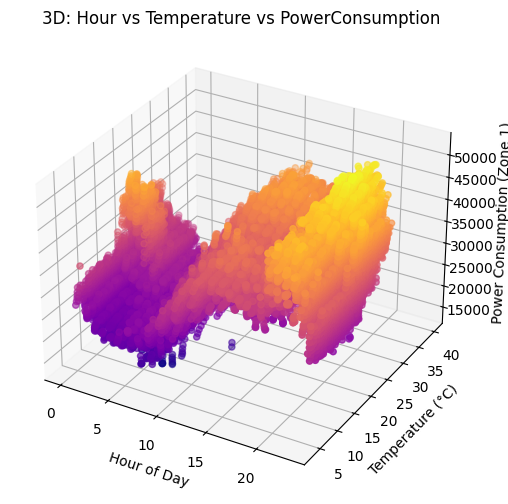

In [26]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = df['Hour']
y = df['Temperature']
z = df['PowerConsumption_Zone1']

ax.scatter(x, y, z, c=z, cmap='plasma')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('Power Consumption (Zone 1)')
ax.set_title('3D: Hour vs Temperature vs PowerConsumption')
plt.show()


## WindSpeed vs DiffuseFlows vs PowerConsumption

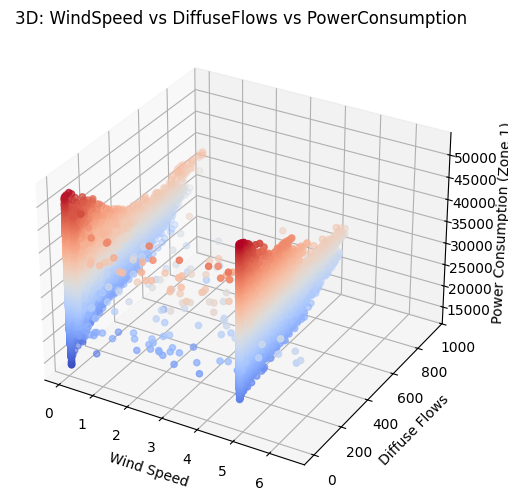

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = df['WindSpeed']
y = df['DiffuseFlows']
z = df['PowerConsumption_Zone1']

ax.scatter(x, y, z, c=z, cmap='coolwarm')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Diffuse Flows')
ax.set_zlabel('Power Consumption (Zone 1)')
ax.set_title('3D: WindSpeed vs DiffuseFlows vs PowerConsumption')
plt.show()


In [13]:
df.drop(columns=["Datetime","Year"],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
 8   Month                   52416 non-null  int32  
 9   Day                     52416 non-null  int32  
 10  Hour                    52416 non-null  int32  
 11  Minute                  52416 non-null  int32  
 12  DayOfWeek               52416 non-null  int32  
 13  IsWeekend               52416 non-null  int64  
dtypes: float64(8), int32(5), int64(1)
memo

In [15]:
features_to_scale = ['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows']
scaler = StandardScaler()
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])

In [16]:
X = df[['Temperature', 'Humidity', 'WindSpeed', 
        'GeneralDiffuseFlows', 'DiffuseFlows',
        'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'IsWeekend']]

y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "KNN Regressor": KNeighborsRegressor()
}


In [19]:
results=[]
for name,model in models.items():
    multi_model=MultiOutputRegressor(model)
    multi_model.fit(X_train,y_train)
    y_pred=multi_model.predict(X_test)

    # compute metrics
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)

    # stroing all models and performace for evaluation
    results.append([name,r2,mae])

In [35]:
results_df=pd.DataFrame(results,columns=["Model","R2_Score","MAE"])

results_df=results_df.sort_values(by="R2_Score",ascending=False).reset_index(drop=True)

results_df

,Model,R2_Score,MAE
0,Random Forest,0.991341,372.051666
1,XGBoost,0.985728,533.913644
2,Decision Tree,0.981524,496.473558
3,KNN Regressor,0.935422,1137.947930
4,Linear Regression,0.619077,3073.755660
5,Ridge Regression,0.619077,3073.751563
6,Lasso Regression,0.619075,3073.678101
7,ElasticNet Regression,0.591256,3151.112911


In [21]:
model=MultiOutputRegressor(RandomForestRegressor())
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# compute metrics
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"R2 Score: {r2}")
print(f"MAE: {mae}")

R2 Score: 0.9913048625797627
MAE: 372.38132029304614


In [22]:
import joblib

# example: model and scaler
joblib.dump(multi_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']